In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv


In [2]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 430.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=7641c1832227e894196d0e93f8e67f07ff7b0a30432ba16485572d7d7e684107
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=5f58f1aa577504edab1328ef612b8a7853285b7860070313bb6d9c46323b8803
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno
import plotly.express as px
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pingouin as pg

In [4]:
df = pd.read_csv("/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv")

In [5]:
df.head(5)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [6]:
#Reclassifying all objects into categorical data 
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = pd.Categorical(df[i])
    else:
        continue

In [7]:

df["F.History"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df["Diabetes"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df["Thrombolysis"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df.cp=pd.Categorical(df.cp,categories=[1,2,3,4],ordered=True)
df.cp = df.cp.map({1:"Grade_1",2:"Grade_2",3:"Grade_3",4:"Grade_4"})
df["fbs"].replace(to_replace=[0,1],value=["<=120mg/dl",">120mg/dl"], inplace= True)
df["restecg"].replace(to_replace=[0,1,2],value=["normal","ST_T_abnormal","LVH"], inplace= True)
df["Mortality"].replace(to_replace=[0,1],value=["Died","Alive"], inplace= True)
df.Mortality=pd.Categorical(df.Mortality,categories=("Alive","Died"))
df["Age.Group"] = pd.Categorical(df["Age.Group"],categories=('21-30', '31-40', '41-50', '51-60', '61-70'),ordered=True)


In [8]:
df.shape

(368, 60)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype   
---  ------                                                                                    --------------  -----   
 0   Age                                                                                       368 non-null    int64   
 1   Age.Group                                                                                 368 non-null    category
 2   Gender                                                                                    368 non-null    category
 3   Locality                                                                                  368 non-null    category
 4   Marital status                                                                            368 non-null    category
 5   Life.Style                                        

In [10]:
df.describe().T.sort_values(by="mean", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
PLATELET_COUNT,368.0,248660.33,76707.56,20000.00,192000.00,237000.00,287000.00,459000.00
WBC,368.0,11181.28,3517.88,5800.00,7800.00,10650.00,13500.00,19590.00
C.P.K,368.0,553.89,957.61,52.00,135.00,188.00,390.00,4289.00
chol,368.0,248.94,50.13,131.00,212.00,249.00,283.00,409.00
BGR,368.0,219.99,139.34,60.00,117.00,164.00,291.00,563.00
thalach,368.0,140.92,22.99,71.00,125.00,144.00,158.00,195.00
S.Sodium,368.0,138.02,4.08,129.00,135.00,138.00,141.00,146.00
trestbps,368.0,132.74,18.19,100.00,120.00,130.00,142.00,200.00
BP,368.0,121.21,24.54,80.50,100.70,120.80,140.70,190.11
S.Chloride,368.0,103.82,4.80,90.00,100.00,104.00,107.00,112.00


<AxesSubplot:>

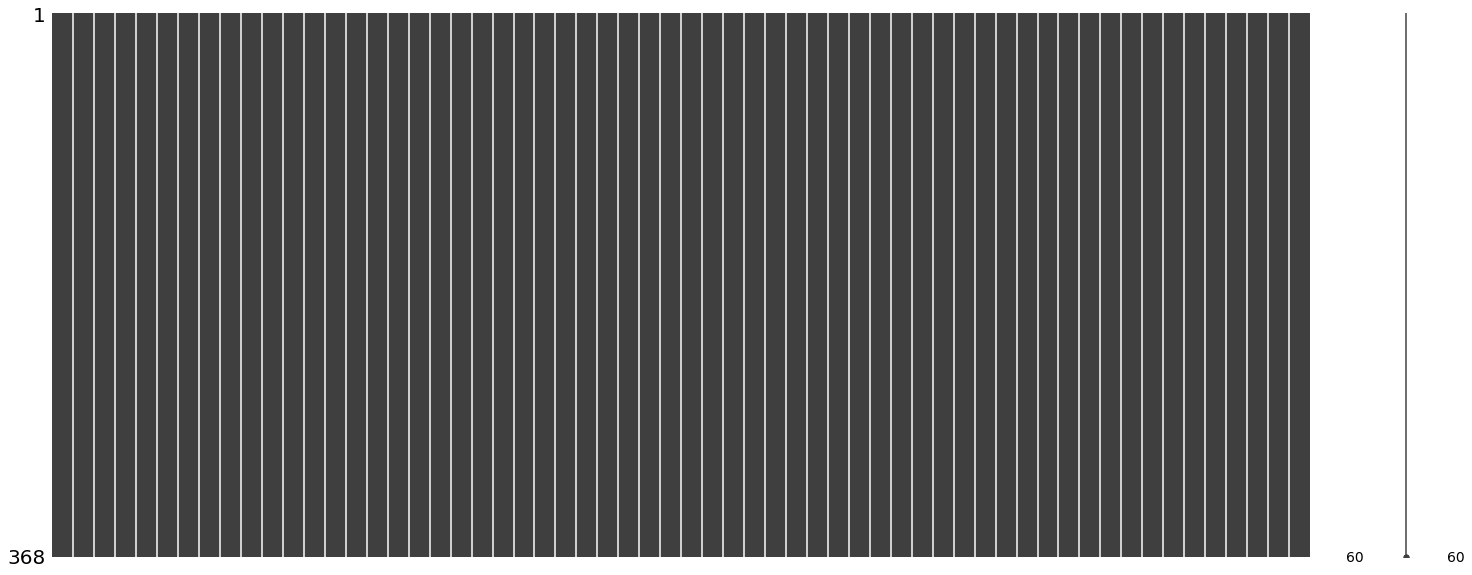

In [11]:
msno.matrix(df)

In [12]:
px.pie(df,values=df["Age.Group"].value_counts(),names=df["Age.Group"].unique(), title="AGE GROUP DISTRIBUTION")

In [13]:
px.pie(df, values = df.Gender.value_counts(), names = df.Gender.unique(), title = "SEX DISTRIBUTION")

In [14]:
columns =[]
for i in df.columns:
    columns.append(i.strip())
print(columns)
df.columns = columns

['Age', 'Age.Group', 'Gender', 'Locality', 'Marital status', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'SK.React', 'Reaction', 'Mortality', 'Follow.Up']


In [15]:
categories = []
for i in df.columns:
    if df[i].dtype == "category":
        categories.append(i)
    else:
        continue
print(categories)

['Age.Group', 'Gender', 'Locality', 'Marital status', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'HTN', 'Allergies', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'SK.React', 'Mortality']


In [16]:
categories.remove('Mortality')


In [17]:
#list of all categorical variables
categories

['Age.Group',
 'Gender',
 'Locality',
 'Marital status',
 'Life.Style',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'cp',
 'SK.React']

In [18]:
# Chi-squared test to determine significant associations among categorical data
from scipy.stats import chi2_contingency

## Hypothesis testing ##

**H0 = Null hypothesis (there is no statistically significant difference among the associations)**

**Ha = There is a statistically significant difference among the associations**

In [19]:
significant_categories=list()
for category in categories:
    table = pd.crosstab(df[category],df.Mortality)
    stat, p, dof, expected =chi2_contingency(table)
    alpha = 0.50
    if p <= alpha:  
        print("Category: ",category)
        print("P-value: ", p.round(3))
        print("H0 rejected","\n")
        fig = px.histogram(df, x= category, color = 'Mortality', color_discrete_map= {"Alive":"aqua","Died":"deeppink"})
        fig.show()
    else:
        continue
    significant_categories.append(category)
print(significant_categories)

Category:  Age.Group
P-value:  0.0
H0 rejected 



Category:  Gender
P-value:  0.0
H0 rejected 



Category:  Locality
P-value:  0.028
H0 rejected 



Category:  Sleep
P-value:  0.277
H0 rejected 



Category:  Category
P-value:  0.022
H0 rejected 



Category:  Depression
P-value:  0.472
H0 rejected 



Category:  Smoking
P-value:  0.003
H0 rejected 



Category:  Family.History
P-value:  0.023
H0 rejected 



Category:  HTN
P-value:  0.001
H0 rejected 



Category:  Others
P-value:  0.0
H0 rejected 



Category:  CO
P-value:  0.0
H0 rejected 



Category:  Diagnosis
P-value:  0.0
H0 rejected 



Category:  cp
P-value:  0.03
H0 rejected 



Category:  SK.React
P-value:  0.0
H0 rejected 



['Age.Group', 'Gender', 'Locality', 'Sleep', 'Category', 'Depression', 'Smoking', 'Family.History', 'HTN', 'Others', 'CO', 'Diagnosis', 'cp', 'SK.React']


In [20]:
significant_categories

['Age.Group',
 'Gender',
 'Locality',
 'Sleep',
 'Category',
 'Depression',
 'Smoking',
 'Family.History',
 'HTN',
 'Others',
 'CO',
 'Diagnosis',
 'cp',
 'SK.React']

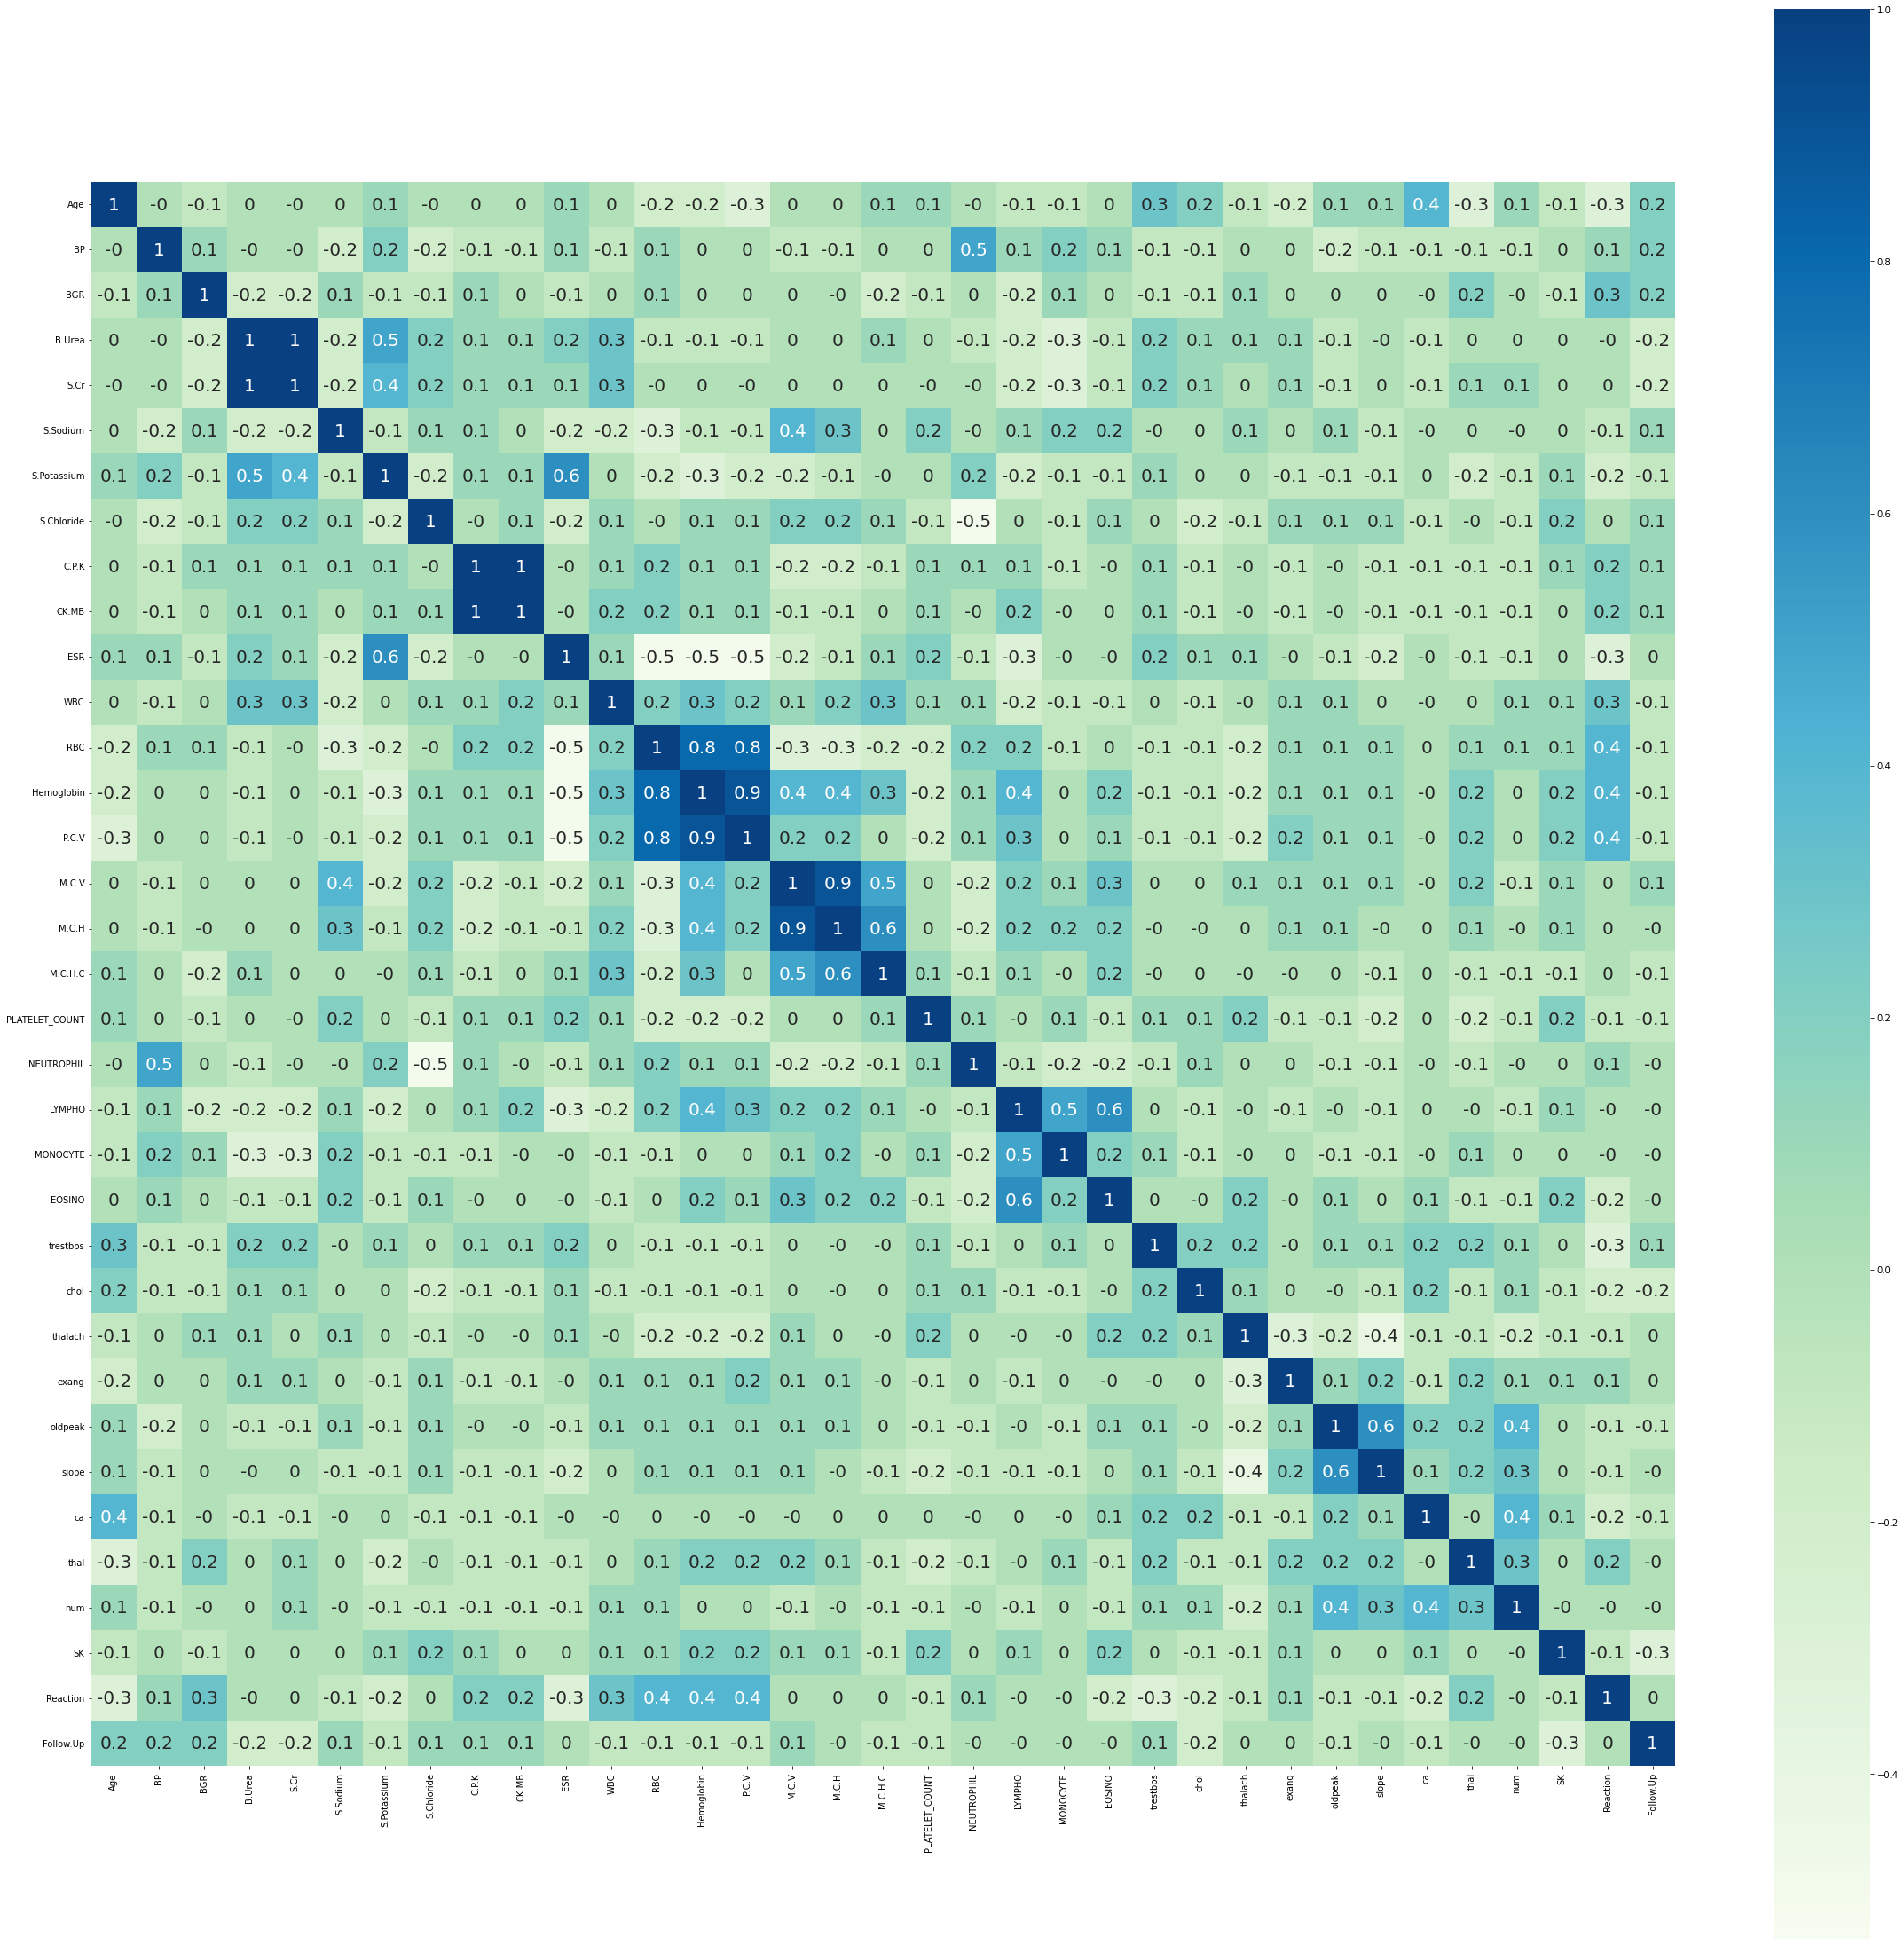

In [21]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr().round(1),vmin= df.corr().values.min(),vmax=1.0,cmap="GnBu",square = True,annot=True, annot_kws={"fontsize":20})
sns.set(font_scale=2)

In [22]:
numerical=df.groupby(by=df.Mortality).mean().T.sort_values(by="Died",ascending=False).style.highlight_max(axis=1, color = "yellow")
numerical

Mortality,Alive,Died
PLATELET_COUNT,254550.000000,247024.305556
WBC,10212.500000,11450.381944
C.P.K,396.037500,597.736111
chol,265.575000,244.319444
BGR,190.137500,228.284722
thalach,139.200000,141.402778
S.Sodium,137.850000,138.065972
trestbps,129.337500,133.687500
BP,119.297500,121.745486
S.Chloride,103.925000,103.788194


In [23]:
continous = list(numerical.index)

In [24]:
significant_continous=list()
for feature in continous:
    x = df[feature][df.Mortality == "Alive"]
    y = df[feature][df.Mortality == "Died"]
    test= pg.ttest(x,y)
    
    alpha = 0.5
    p = test['p-val'][0].round(3)
    if p < alpha:
        print(feature.upper(),"vs Mortality")
        print("P-value is :",p)
        p= px.box(df,x=feature, y="Mortality",color="Mortality",color_discrete_map= {"Alive":"aqua","Died":"deeppink"})
        p.show()
        significant_continous.append(feature)
    else:
        continue

PLATELET_COUNT vs Mortality
P-value is : 0.412


WBC vs Mortality
P-value is : 0.004


C.P.K vs Mortality
P-value is : 0.032


CHOL vs Mortality
P-value is : 0.007


BGR vs Mortality
P-value is : 0.016


THALACH vs Mortality
P-value is : 0.402


TRESTBPS vs Mortality
P-value is : 0.031


BP vs Mortality
P-value is : 0.43


M.C.V vs Mortality
P-value is : 0.043


CK.MB vs Mortality
P-value is : 0.147


AGE vs Mortality
P-value is : 0.047


B.UREA vs Mortality
P-value is : 0.276


FOLLOW.UP vs Mortality
P-value is : 0.001


M.C.H vs Mortality
P-value is : 0.038


RBC vs Mortality
P-value is : 0.149


NEUTROPHIL vs Mortality
P-value is : 0.001


EOSINO vs Mortality
P-value is : 0.051


NUM vs Mortality
P-value is : 0.021


OLDPEAK vs Mortality
P-value is : 0.014


S.CR vs Mortality
P-value is : 0.208


CA vs Mortality
P-value is : 0.006


SK vs Mortality
P-value is : 0.014


REACTION vs Mortality
P-value is : 0.0


EXANG vs Mortality
P-value is : 0.045


M.C.H.C vs Mortality
P-value is : 0.104


LYMPHO vs Mortality
P-value is : 0.051


MONOCYTE vs Mortality
P-value is : 0.269


In [25]:
print(significant_continous)


['PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'SK', 'Reaction', 'exang', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']


In [26]:
# removing exang ,reaction and SK due to poor or insuffecient data
print(significant_continous)


['PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'SK', 'Reaction', 'exang', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']
